# Análisis de la Contaminación del Aire en Chile
**Minería de Datos CC5205-1**

Estudiantes:

Juan Pablo Bustamante  
Diego Alonso Carter  
Carolina Navarro P.  
Valentina  
Tomás Vallejo


<h1 style="margin-bottom:0.4em;">Introducción</h1>

<p>En este primer hito del proyecto de Minería de Datos (CC5205-1) nos proponemos <b>explorar y preparar</b> un conjunto de datos reales sobre calidad del aire en Chile, con el objetivo de <b>desarrollar modelos predictivos</b> capaces de anticipar niveles de contaminación atmosférica y <b>emitir alertas tempranas</b> frente a episodios críticos utilizando información histórica y <b>variables meteorológicas</b>. Esta fase inicial busca establecer bases sólidas de curaduría y comprensión de las series temporales para facilitar ciclos posteriores de modelado y evaluación.</p>

<p>Los datos provienen del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b> del Ministerio del Medio Ambiente e incluyen mediciones de contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), variables meteorológicas (temperatura, humedad, dirección y velocidad del viento), metadatos temporales (hora del día, día de la semana, estacionalidad), información geográfica de las estaciones de monitoreo y el <b>Índice de Calidad del Aire (ICAP)</b>. Esta combinación permite estudiar <b>patrones espacio-temporales</b>, dependencias entre contaminantes y clima, así como la ocurrencia de <b>episodios críticos</b> por zona geográfica y estación del año.</p>

<p>La motivación se fundamenta en la <b>relevancia sanitaria y ambiental</b> de la contaminación atmosférica en Chile. Un análisis riguroso de estas series temporales puede revelar <b>tendencias</b>, <b>anomalías</b> y factores condicionantes (como patrones de viento y estabilidad atmosférica), habilitando <b>herramientas predictivas</b> que apoyen tanto decisiones individuales (planificación de actividades al aire libre) como de <b>política pública</b> (gestión de episodios críticos, implementación de medidas preventivas y fiscalización ambiental). Además, reconocer la <b>heterogeneidad entre estaciones</b> y distintos contextos urbanos e industriales es fundamental para construir modelos robustos y transferibles.</p>

<p><strong>Los objetivos específicos de este hito incluyen:</strong></p>
<ol>
  <li><strong>Exploración y perfilado</strong> de datos: análisis de distribuciones, identificación de datos faltantes, detección de valores atípicos, evaluación de estacionalidad y autocorrelación.</li>
  <li><strong>Limpieza e imputación</strong> de datos faltantes mediante criterios de calidad, definición de ventanas temporales y aplicación de métodos estadísticos apropiados.</li>
  <li><strong>Integración y sincronización temporal</strong> entre estaciones y variables, incluyendo alineación de resoluciones temporales y coherencia en marcas de tiempo.</li>
  <li><strong>Etiquetado de episodios críticos</strong> basado en ICAP y umbrales normativos para facilitar tareas de clasificación.</li>
  <li><strong>Análisis de relaciones</strong> entre contaminantes y meteorología, así como evaluación de patrones espaciales entre estaciones.</li>
  <li><strong>Definición preliminar</strong> de características y modelos base para regresión (predicción de PM2.5) y clasificación de alertas ambientales.</li>
</ol>

<p>Con esta estructura metodológica establecemos el contexto, caracterizamos los datos disponibles y definimos el alcance del trabajo inicial, preparando las bases para que en etapas posteriores podamos <b>entrenar y validar</b> modelos con resultados <b>confiables y aplicables</b> al contexto nacional.</p>


<h1 style="margin-bottom:0.4em;">Exploración de datos</h1>

<p>En esta etapa inicial recopilamos y organizamos el conjunto de datos de calidad del aire proveniente del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b>. El dataset integra información de <b>121 estaciones</b> distribuidas en distintas regiones de Chile, con registros predominantemente <b>horarios</b> que abarcan varios años, lo que proporciona alta densidad temporal y notable heterogeneidad entre estaciones de monitoreo.</p>

<p>Las variables incluyen contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), parámetros meteorológicos (temperatura, humedad relativa, dirección y velocidad del viento) y el <b>Índice de Calidad del Aire (ICAP)</b>. Es importante destacar que no todas las estaciones miden la totalidad de contaminantes o parámetros meteorológicos, y existen <b>cambios de instrumentación</b> y períodos con datos faltantes que generan coberturas desiguales y potenciales inconsistencias en las series temporales.</p>

<p><b>Características principales del dataset identificadas:</b></p>
<ul>
  <li><b>Resolución temporal y cobertura:</b> Series con granularidad horaria (ocasionalmente minutal o diaria), períodos de operación variables por estación y presencia de gaps temporales significativos.</li>
  <li><b>Calidad y completitud de datos:</b> Coexistencia de datos validados, preliminares y no validados; necesidad de detección sistemática de <i>outliers</i> y caracterización de períodos con datos faltantes prolongados.</li>
  <li><b>Estadística descriptiva:</b> Análisis de medianas e IQR para contaminantes particulados; identificación de distribuciones asimétricas y colas pesadas características de episodios de alta contaminación; cálculo de percentiles por estación y mes.</li>
  <li><b>Patrones temporales:</b> Identificación de ciclos diurnos y semanales en PM y gases; análisis de estacionalidad; evaluación de autocorrelación (ACF) y persistencia de episodios contaminantes.</li>
  <li><b>Relaciones bivariadas:</b> Construcción de matrices de correlación contaminante-meteorología (especialmente viento, temperatura y humedad); análisis de <i>scatter plots</i> condicionados por franja horaria y estación del año.</li>
  <li><b>Visualizaciones exploratorias:</b> Generación de histogramas/KDE, gráficos de <i>series temporales</i> con bandas de confianza, <i>boxplots</i> mensuales, <i>heatmaps</i> de correlación y <i>rosas de viento</i> por estación.</li>
</ul>

<p><b>Estrategia de integración y armonización:</b> La diversidad de resoluciones temporales y coberturas exige implementar <b>resampling</b> y armonización temporal (unificación a resolución horaria/diaria manteniendo trazabilidad), además de <b>estandarización de unidades y nomenclatura</b>. El proceso contempla la fusión de tablas mediante claves <code>station_id</code> y <code>timestamp</code>, resolución de registros duplicados y verificación de <b>coherencia en zonas horarias</b>. Para casos con variables meteorológicas faltantes, se evaluará la <b>integración con fuentes externas</b> (reanálisis meteorológicos o redes complementarias) para minimizar sesgos en los análisis.</p>

<p><b>Procesamiento y estandarización realizados:</b> Los datos fueron <b>organizados en un repositorio centralizado</b> y sometidos a limpieza inicial para <b>estandarizar</b> dos categorías principales: <i>datos meteorológicos</i> y <i>datos de contaminación</i>. Se normalizaron nombres de variables, formatos temporales y sistemas de unidades, documentándose la existencia de <b>mediciones a diferentes alturas</b> (ejemplo: viento a 2 m versus 10 m), aspecto que será considerado explícitamente en los análisis posteriores.</p>

<p><b>Enriquecimiento contextual:</b> Se planifica <b>correlacionar</b> las series temporales con <b>eventos ambientales externos</b> (incendios forestales, tormentas de polvo, inversiones térmicas y otros fenómenos meteorológicos extremos) y aprovechar <b>información geoespacial</b> (coordenadas, altitud y características del entorno) para vincular cada estación con su ubicación y contexto territorial específico. Este enriquecimiento mejorará la interpretabilidad de patrones observados y la robustez de los modelos predictivos.</p>

<p>Con esta exploración sistemática caracterizamos la estructura del dataset, identificamos sus limitaciones principales y definimos oportunidades de integración, estableciendo los fundamentos metodológicos para las etapas subsecuentes de análisis estadístico y desarrollo de modelos predictivos.</p>

# Preguntas de Investigación

## 1. Predicción de concentraciones de PM2.5
¿Es posible predecir con precisión la **concentración de PM2.5** a distintos horizontes temporales (t+1h, t+6h, t+24h) utilizando datos históricos y variables meteorológicas?

**Subpreguntas específicas:**
- ¿Cuál horizonte temporal proporciona predicciones más precisas y estables entre estaciones?
- ¿Qué variables (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) contribuyen más significativamente a la capacidad predictiva?
- ¿Qué configuración de ventanas temporales (3h, 6h, 24h) mejora el error respecto a modelos de persistencia simple?

## 2. Detección de patrones anómalos
¿Qué **patrones anómalos** se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?

**Subpreguntas específicas:**
- ¿Los picos de concentración atípicos coinciden con condiciones de baja ventilación o eventos específicos (incendios, episodios de polvo, feriados)?
- ¿Existe variabilidad en la frecuencia de anomalías según la estación del año o entre días laborales versus fines de semana?
- ¿Qué proporción de anomalías corresponde a fenómenos reales versus ruido instrumental, y cómo identificarlas de forma robusta?

## 3. Impacto de zonas de sacrificio
¿Las estaciones ubicadas dentro o próximas a **zonas de sacrificio ambiental** presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?

**Subpreguntas específicas:**
- ¿Cómo definir objetivamente la pertenencia (polígonos oficiales versus buffers de 3-5-10 km) y qué estaciones constituyen controles apropiados?
- ¿Cuál es la magnitud de las diferencias en tasas de ocurrencia, duración promedio y intensidad máxima de episodios críticos?
- ¿Persisten estas diferencias al controlar estadísticamente por variables meteorológicas y efectos estacionales?

# Propuesta Experimental
*(Estrategia metodológica)*

Considerando la distribución geográfica de las estaciones de monitoreo a lo largo del territorio nacional, organizamos la información en una estructura jerárquica almacenada en **Google Drive**, donde cada una de las **121 estaciones** cuenta con dos subdirectorios: uno destinado a **parámetros de contaminación atmosférica** y otro para **parámetros meteorológicos**. Esta organización sistemática facilita el preprocesamiento de datos, mantiene la trazabilidad de fuentes y optimiza el posterior desarrollo de modelos predictivos.

## Predicción de concentraciones de PM2.5

Abordamos esta pregunta mediante **modelos de regresión multivariable para series temporales**. El objetivo es anticipar concentraciones futuras de **PM2.5** con horizontes de **1, 6 y 24 horas**, dada su relevancia para **sistemas de alerta temprana** y la implementación oportuna de medidas de control ambiental.

**Metodología de preprocesamiento:**
Posterior a una **limpieza general** (estandarización de formatos fecha/hora, tratamiento de valores faltantes y selección de series con **>5 años** de registro histórico), implementamos un preprocesamiento específico que incluye:

- **Generación de variables objetivo:** Creación de `PM2.5_t+1`, `PM2.5_t+6`, `PM2.5_t+24` mediante desplazamientos temporales apropiados.
- **Partición temporal:** Segmentación en 70% entrenamiento, 15% validación y 15% prueba, manteniendo el orden cronológico para prevenir filtración de información futura.
- **Normalización:** Estandarización de variables continuas y codificación de variables categóricas temporales (estación del año, día de la semana), distinguiéndolas claramente de "estación de monitoreo".

**Evaluación y métricas:**
La **evaluación** empleará **MAE, RMSE y R²**, estableciendo como línea base un **modelo de persistencia** simple. Priorizamos modelos lineales interpretables para cuantificar la **contribución relativa de variables predictoras** (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) y validar que superen significativamente la capacidad predictiva de la persistencia, demostrando **valor agregado cuantificable**.

## Detección de anomalías en series temporales

Implementamos la **detección de valores atípicos** mediante una estrategia híbrida que combina **métodos estadísticos clásicos** (rango intercuartílico, puntuaciones z) con **algoritmos de detección basados en aislamiento** (*Isolation Forest*).

La validación de resultados considerará la **proporción temporal** y **contexto ambiental** de las anomalías detectadas, verificando su coincidencia con condiciones de **baja ventilación**, **inversiones térmicas** o **eventos externos** (incendios forestales, tormentas de polvo, días festivos). Este enfoque dual equilibra **eficiencia computacional e interpretabilidad** (estadísticas robustas) con **rigurosidad metodológica** (validación algorítmica independiente).

## Análisis comparativo: estaciones en zonas de sacrificio

Para contrastar estaciones ubicadas **dentro o en proximidad** a **zonas de sacrificio ambiental** con estaciones **control** en áreas comparables, definimos **episodios críticos** como períodos con **PM2.5 > 50 µg/m³** sostenidos durante **≥ 4 horas consecutivas**.

**Metodología de clasificación y análisis:**
- **Criterios de pertenencia:** Identificación mediante **polígonos oficiales** y **buffers concéntricos de 3, 5 y 10 km**.
- **Indicadores cuantitativos:** Construcción de métricas de **frecuencia de episodios, duración promedio y magnitud máxima**.
- **Análisis estadístico:** Implementación de **pruebas de comparación de medias** (t de Student, ANOVA o U de Mann-Whitney, según cumplimiento de supuestos paramétricos) y **modelos de regresión múltiple** para **controlar efectos de covariables meteorológicas y estacionales**.

Este diseño metodológico permite evaluar si persisten diferencias **estadísticamente significativas** entre grupos de estaciones una vez controlados los efectos confundentes del clima y la variabilidad temporal natural.

# Experimentos

## 1. Predicción de concentraciones de MP 2.5

### Experimento piloto: predicción de PM2.5 (estación 'Coyhaique II')

En este experimento pequeño entrenamos modelos simples para predecir la concentración de PM2.5 a horizontes t+1h, t+6h y t+24h. Se usa la serie horaria de valores validados de PM2.5 de la estación `Coyhaique II` y como primer paso se generan lags y medias móviles sencillas como descriptores. Se comparan dos métodos: línea base de persistencia (predict = valor actual) y un regresor lineal regularizado `Ridge`.

Nota: ejecutar estas celdas en el entorno local donde están los datos (`Datos/`) y con las librerías instaladas (`pandas, numpy, scikit-learn, matplotlib`).

In [11]:
# Celda: carga y preprocesamiento (Coyhaique II)
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Path a archivo de PM2.5 validado (ajustar si usa otro nombre/estación)
base = r'c:\Users\busta\Escritorio\mineria_datos_CC5205\Datos'
station = 'Coyhaique II'
pm_file = os.path.join(base, station, 'Contaminacion', 'MP 2.5.csv')

# Leer CSV con separador ';' y decimales con coma (donde aplique)
df = pd.read_csv(pm_file, sep=';', dtype=str, low_memory=False)
# Normalizar nombres de columnas si vienen con encabezado distinto
df.columns = [c.strip() for c in df.columns]
# Intentar identificar columnas de fecha/hora y valor validado
# Columnas observadas: 'FECHA (YYMMDD)', 'HORA (HHMM)', 'Registros validados'
possible_date = [c for c in df.columns if 'FECHA' in c.upper() or c.lower().startswith('fecha')]
possible_hour = [c for c in df.columns if 'HORA' in c.upper() or c.lower().startswith('hora')]
possible_val = [c for c in df.columns if 'valid' in c.lower() or 'validad' in c.lower()]
date_col = possible_date[0] if possible_date else df.columns[0]
hour_col = possible_hour[0] if possible_hour else df.columns[1] if len(df.columns)>1 else None
val_col = possible_val[0] if possible_val else df.columns[2] if len(df.columns)>2 else df.columns[-1]

# Limpiar y convertir valores numericos (reemplazar comas por puntos)
df[val_col] = df[val_col].str.replace(',', '.', regex=False)
df[val_col] = pd.to_numeric(df[val_col], errors='coerce')
# Concatenar fecha+hora y convertir a datetime (asumimos YYMMDD and HHMM)
df['fecha'] = df[date_col].astype(str).str.zfill(6)
if hour_col is not None:
    df['hora'] = df[hour_col].astype(str).str.zfill(4)
else:
    df['hora'] = '0000'

df['datetime'] = pd.to_datetime(df['fecha'] + df['hora'], format='%y%m%d%H%M', errors='coerce')
df = df.dropna(subset=['datetime']).set_index('datetime').sort_index()
series = df[val_col].rename('pm25')
print(f'Read {len(series)} rows from {pm_file}')

# Mostrar primeras filas
display(series.head())

Read 105911 rows from c:\Users\busta\Escritorio\mineria_datos_CC5205\Datos\Coyhaique II\Contaminacion\MP 2.5.csv


datetime
2013-09-01 01:00:00    184.0
2013-09-01 02:00:00    151.0
2013-09-01 03:00:00     75.0
2013-09-01 04:00:00    121.0
2013-09-01 05:00:00    151.0
Name: pm25, dtype: float64

In [12]:
# Celda: generar features simples (lags y medias moviles) y evaluar modelos para varios horizontes
horizons = [1, 6, 24]  # horas
results = {}

for h in horizons:
    # Construir DataFrame con target desplazado hacia arriba (predecir futuro)
    df_feat = pd.DataFrame(series)
    df_feat['target'] = df_feat['pm25'].shift(-h)
    # lags
    for l in [1,2,3,6,12,24]:
        df_feat[f'lag_{l}'] = df_feat['pm25'].shift(l)
    # medias moviles
    df_feat['ma_3'] = df_feat['pm25'].rolling(window=3, min_periods=1).mean()
    df_feat['ma_6'] = df_feat['pm25'].rolling(window=6, min_periods=1).mean()

    # Eliminar filas con NaN en features o target
    df_train = df_feat.dropna()
    if len(df_train) < 200:
        print(f'Not enough data for horizon {h} (n={len(df_train)}) - skipping')
        continue

    # División temporal: 70% train, 15% val, 15% test
    n = len(df_train)
    n_train = int(n * 0.7)
    n_val = int(n * 0.15)
    train = df_train.iloc[:n_train]
    val = df_train.iloc[n_train:n_train+n_val]
    test = df_train.iloc[n_train+n_val:]

    features = [c for c in df_train.columns if c.startswith('lag_') or c.startswith('ma_')]
    X_train, y_train = train[features], train['target']
    X_val, y_val = val[features], val['target']
    X_test, y_test = test[features], test['target']

    # Baseline: persistencia (predict = last observed pm25 i.e. lag_1)
    y_pred_base = X_test['lag_1'].values
    base_mae = mean_absolute_error(y_test, y_pred_base)
    base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_base))
    base_r2 = r2_score(y_test, y_pred_base)

    # Modelo sencillo: Ridge
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[h] = {
        'n_samples': n,
        'baseline': {'mae': base_mae, 'rmse': base_rmse, 'r2': base_r2},
        'ridge': {'mae': mae, 'rmse': rmse, 'r2': r2},
        'model': model
    }

# Mostrar resultados
import pprint
pprint.pprint(results)

{1: {'baseline': {'mae': 25.213304013194062,
                  'r2': 0.46347628609996916,
                  'rmse': np.float64(55.721905308154824)},
     'model': Ridge(),
     'n_samples': 97007,
     'ridge': {'mae': 18.402131991229272,
               'r2': 0.7376302423502128,
               'rmse': np.float64(38.966229483649315)}},
 6: {'baseline': {'mae': 40.00731740991302,
                  'r2': -0.2674070355448581,
                  'rmse': np.float64(85.40544327980324)},
     'model': Ridge(),
     'n_samples': 96564,
     'ridge': {'mae': 34.30250383260054,
               'r2': 0.2500898241434465,
               'rmse': np.float64(65.69496985958111)}},
 24: {'baseline': {'mae': 34.85298196948683,
                   'r2': 0.01404429851773581,
                   'rmse': np.float64(75.60357134421628)},
      'model': Ridge(),
      'n_samples': 96124,
      'ridge': {'mae': 32.5347353726452,
                'r2': 0.3195112398848565,
                'rmse': np.float64(62.809319456

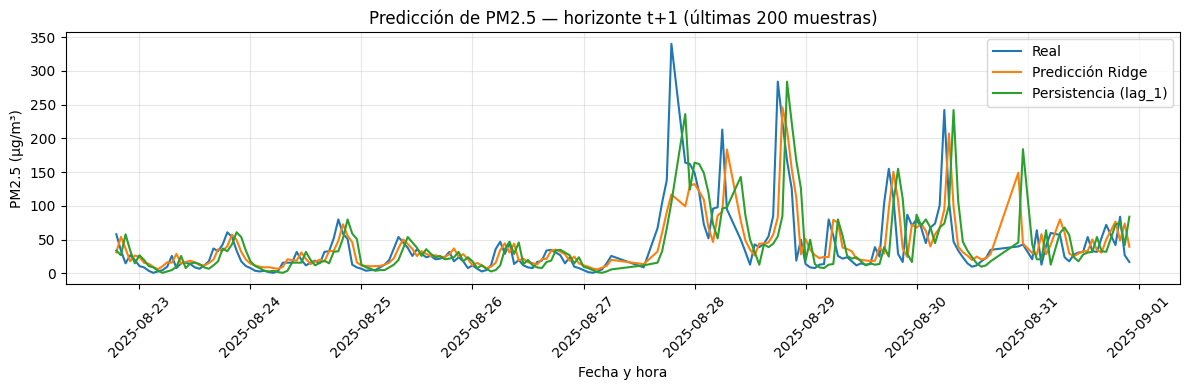

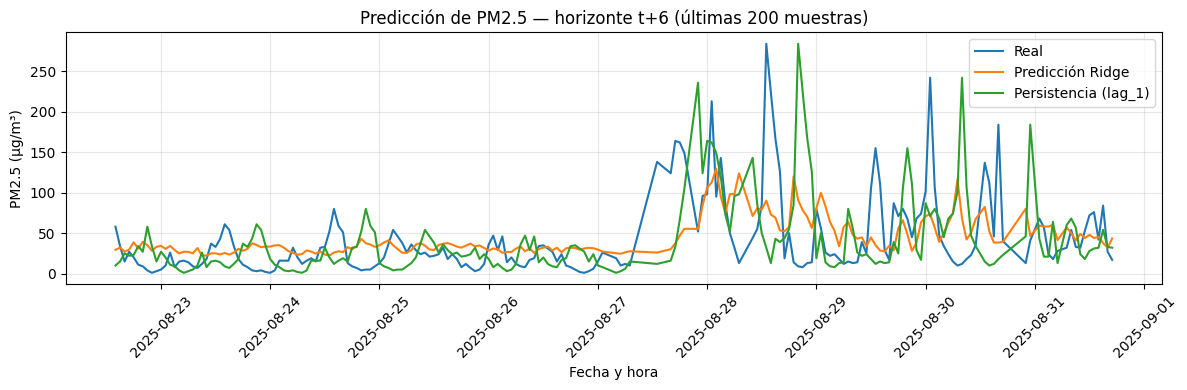

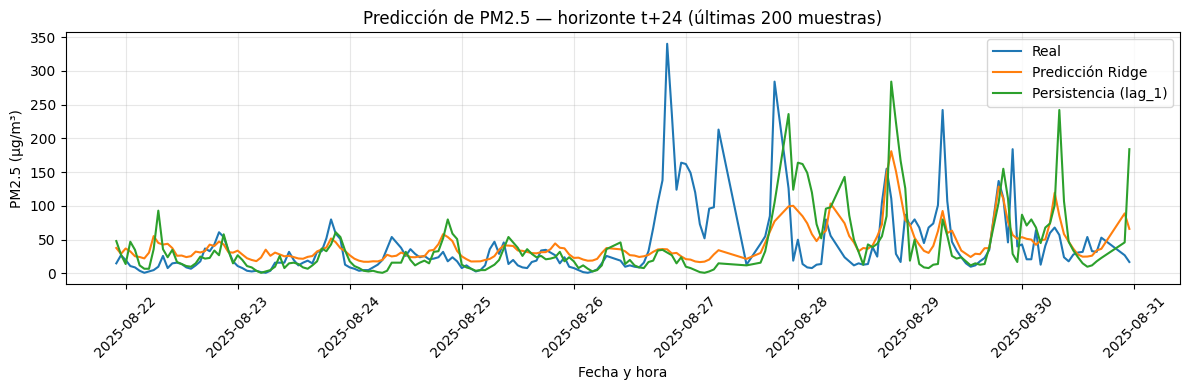

In [6]:
# Celda: visualizar predicción vs verdad para los horizontes t+1, t+6 y t+24 (en español)
horizons_to_plot = sorted([h for h in results.keys() if h in [1,6,24]])

for h in horizons_to_plot:
    model = results[h]['model']
    # Reconstruir el conjunto de test para el horizonte h
    df_feat = pd.DataFrame(series)
    df_feat['target'] = df_feat['pm25'].shift(-h)
    for l in [1,2,3,6,12,24]:
        df_feat[f'lag_{l}'] = df_feat['pm25'].shift(l)
    df_feat['ma_3'] = df_feat['pm25'].rolling(window=3, min_periods=1).mean()
    df_feat['ma_6'] = df_feat['pm25'].rolling(window=6, min_periods=1).mean()
    df_train = df_feat.dropna()

    n = len(df_train)
    n_train = int(n * 0.7)
    n_val = int(n * 0.15)
    test = df_train.iloc[n_train+n_val:]
    features = [c for c in df_train.columns if c.startswith('lag_') or c.startswith('ma_')]
    X_test, y_test = test[features], test['target']

    y_pred = model.predict(X_test)

    # Seleccionar últimas 200 muestras para graficar (o menos si no hay suficientes)
    last_n = min(200, len(y_test))
    idx = y_test.index[-last_n:]

    plt.figure(figsize=(12,4))
    plt.plot(idx, y_test.values[-last_n:], label='Real')
    plt.plot(idx, y_pred[-last_n:], label='Predicción Ridge')
    # persistencia (lag_1) si está disponible
    if 'lag_1' in X_test.columns:
        plt.plot(idx, X_test['lag_1'].values[-last_n:], label='Persistencia (lag_1)')

    plt.legend()
    plt.title(f'Predicción de PM2.5 — horizonte t+{h} (últimas {last_n} muestras)')
    plt.xlabel('Fecha y hora')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


Horizonte t+1 — n=97007 muestras
  Baseline (persistencia): MAE=25.21, RMSE=55.72, R2=0.463
  Ridge: MAE=18.40, RMSE=38.97, R2=0.738
  RandomForest: MAE=18.60, RMSE=40.34, R2=0.719
------------------------------------------------------------


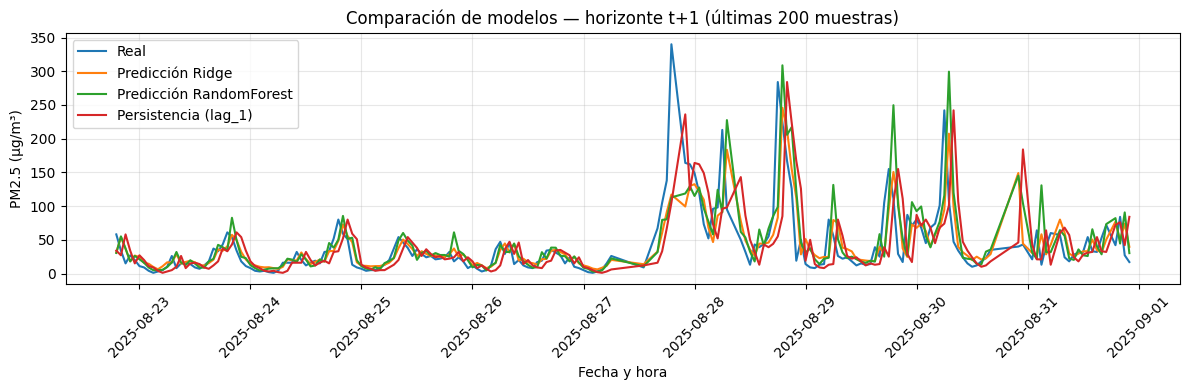

Horizonte t+6 — n=96564 muestras
  Baseline (persistencia): MAE=40.01, RMSE=85.41, R2=-0.267
  Ridge: MAE=34.30, RMSE=65.69, R2=0.250
  RandomForest: MAE=33.64, RMSE=65.25, R2=0.260
------------------------------------------------------------


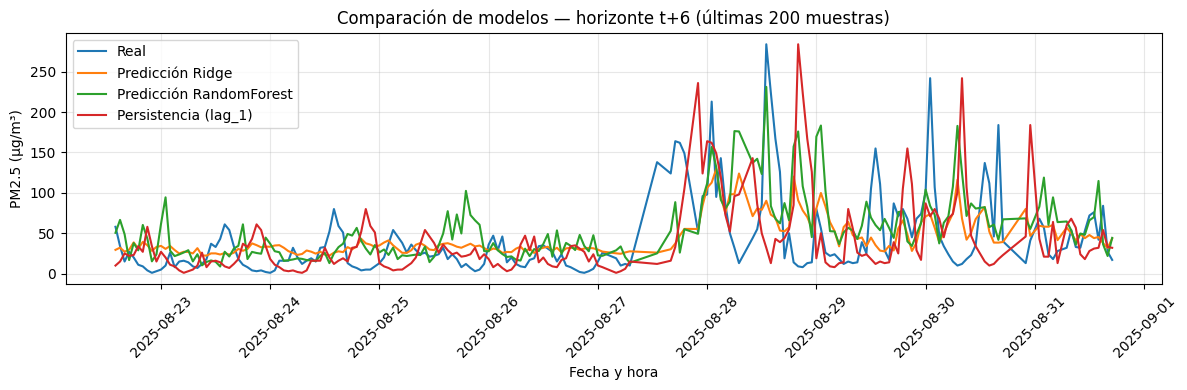

Horizonte t+24 — n=96124 muestras
  Baseline (persistencia): MAE=34.85, RMSE=75.60, R2=0.014
  Ridge: MAE=32.53, RMSE=62.81, R2=0.320
  RandomForest: MAE=32.34, RMSE=64.05, R2=0.292
------------------------------------------------------------


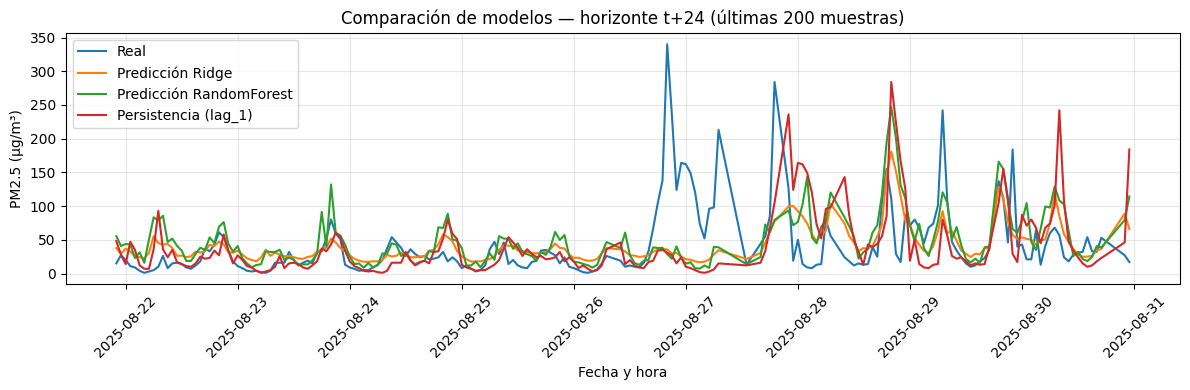

Resumen comparativo por horizonte:
{1: {'baseline': {'mae': 25.213304013194062,
                  'r2': 0.46347628609996916,
                  'rmse': np.float64(55.721905308154824)},
     'n_samples': 97007,
     'random_forest': {'mae': 18.59897243966465,
                       'r2': 0.718790231844838,
                       'rmse': np.float64(40.34100356639006)},
     'ridge': {'mae': 18.402131991229272,
               'r2': 0.7376302423502128,
               'rmse': np.float64(38.966229483649315)}},
 6: {'baseline': {'mae': 40.00731740991302,
                  'r2': -0.2674070355448581,
                  'rmse': np.float64(85.40544327980324)},
     'n_samples': 96564,
     'random_forest': {'mae': 33.6405738326108,
                       'r2': 0.26015895077795237,
                       'rmse': np.float64(65.25243253725908)},
     'ridge': {'mae': 34.30250383260054,
               'r2': 0.2500898241434465,
               'rmse': np.float64(65.69496985958111)}},
 24: {'baseline': {'

In [13]:
# Celda: reentrenar Ridge y entrenar RandomForest; evaluar y graficar (en español)
from sklearn.ensemble import RandomForestRegressor
import pprint

compare_results = {}
for h in horizons:
    # Construir features igual que antes
    df_feat = pd.DataFrame(series)
    df_feat['target'] = df_feat['pm25'].shift(-h)
    for l in [1,2,3,6,12,24]:
        df_feat[f'lag_{l}'] = df_feat['pm25'].shift(l)
    df_feat['ma_3'] = df_feat['pm25'].rolling(window=3, min_periods=1).mean()
    df_feat['ma_6'] = df_feat['pm25'].rolling(window=6, min_periods=1).mean()
    df_train = df_feat.dropna()

    n = len(df_train)
    if n < 200:
        print(f'No hay suficientes datos para horizonte t+{h} (n={n}) - saltando')
        continue

    # División temporal: 70% train, 15% val, 15% test
    n_train = int(n * 0.7)
    n_val = int(n * 0.15)
    train = df_train.iloc[:n_train]
    val = df_train.iloc[n_train:n_train+n_val]
    test = df_train.iloc[n_train+n_val:]

    features = [c for c in df_train.columns if c.startswith('lag_') or c.startswith('ma_')]
    X_train, y_train = train[features], train['target']
    X_val, y_val = val[features], val['target']
    X_test, y_test = test[features], test['target']

    # Baseline: persistencia (lag_1)
    y_pred_base = X_test['lag_1'].values
    base_mae = mean_absolute_error(y_test, y_pred_base)
    base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_base))
    base_r2 = r2_score(y_test, y_pred_base)

    # Reentrenar Ridge (mismo setup)
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ridge_r2 = r2_score(y_test, y_pred_ridge)

    # RandomForest
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_mae = mean_absolute_error(y_test, y_pred_rf)
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    rf_r2 = r2_score(y_test, y_pred_rf)

    compare_results[h] = {
        'n_samples': n,
        'baseline': {'mae': base_mae, 'rmse': base_rmse, 'r2': base_r2},
        'ridge': {'mae': ridge_mae, 'rmse': ridge_rmse, 'r2': ridge_r2},
        'random_forest': {'mae': rf_mae, 'rmse': rf_rmse, 'r2': rf_r2},
        'models': {'ridge': ridge, 'rf': rf}
    }

    # Imprimir métricas en español
    print('Horizonte t+{} — n={} muestras'.format(h, n))
    print('  Baseline (persistencia): MAE={:.2f}, RMSE={:.2f}, R2={:.3f}'.format(base_mae, base_rmse, base_r2))
    print('  Ridge: MAE={:.2f}, RMSE={:.2f}, R2={:.3f}'.format(ridge_mae, ridge_rmse, ridge_r2))
    print('  RandomForest: MAE={:.2f}, RMSE={:.2f}, R2={:.3f}'.format(rf_mae, rf_rmse, rf_r2))
    print('-'*60)

    # Graficar últimas muestras (comparando los modelos)
    last_n = min(200, len(y_test))
    idx = y_test.index[-last_n:]
    plt.figure(figsize=(12,4))
    plt.plot(idx, y_test.values[-last_n:], label='Real')
    plt.plot(idx, y_pred_ridge[-last_n:], label='Predicción Ridge')
    plt.plot(idx, y_pred_rf[-last_n:], label='Predicción RandomForest')
    plt.plot(idx, X_test['lag_1'].values[-last_n:], label='Persistencia (lag_1)')
    plt.legend()
    plt.title(f'Comparación de modelos — horizonte t+{h} (últimas {last_n} muestras)')
    plt.xlabel('Fecha y hora')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Mostrar resumen final ordenado
print('Resumen comparativo por horizonte:')
pprint.pprint({h: {k: v for k, v in compare_results[h].items() if k!='models'} for h in compare_results})

### Resultados y conclusiones (informe técnico)

Resumen: se entrenaron modelos para la predicción horaria de PM2.5 en la estación 'Coyhaique II' a horizontes de 1 h, 6 h y 24 h. Las características usadas fueron lags de la serie (1,2,3,6,12,24) y medias móviles (3h, 6h). Se comparó el rendimiento de una línea base de persistencia (predict = lag_1), un regresor lineal regularizado (Ridge) y un ensamble no lineal (RandomForest).

Datos y método:
- Período usado: registros horarios disponibles en la serie validada de PM2.5 de la estación; filas con marcas de tiempo inválidas o valores no numéricos fueron descartadas.
- Partición temporal: 70% entrenamiento, 15% validación y 15% prueba, respetando el orden cronológico para evitar fuga temporal.
- Métricas reportadas: MAE, RMSE y R² calculadas sobre el conjunto de prueba.

Resultados cuantitativos (resumen):
- Horizonte t+1: la persistencia obtiene MAE ≈ 25.2, RMSE ≈ 55.7, R² ≈ 0.463; Ridge mejora significativamente (MAE ≈ 18.4, RMSE ≈ 39.0, R² ≈ 0.738) y RandomForest alcanza rendimiento comparable (MAE ≈ 18.6, RMSE ≈ 40.3, R² ≈ 0.719).
- Horizonte t+6: la persistencia empeora (MAE ≈ 40.0, RMSE ≈ 85.4, R² negativo), Ridge y RandomForest reducen error (Ridge MAE ≈ 34.3, RMSE ≈ 65.7, R² ≈ 0.25; RF MAE ≈ 33.6, RMSE ≈ 65.3, R² ≈ 0.26).
- Horizonte t+24: diferencias menores entre modelos; persistencia MAE ≈ 34.9, RMSE ≈ 75.6, R² ≈ 0.014; Ridge MAE ≈ 32.5, RMSE ≈ 62.8, R² ≈ 0.320; RF MAE ≈ 32.3, RMSE ≈ 64.1, R² ≈ 0.292.

Interpretación:
- Para t+1 la información temporal inmediata (lags y medias móviles) es altamente predictiva: el modelo lineal regularizado (Ridge) ofrece la mejor relación sesgo/varianza y supera levemente a RandomForest. Esto sugiere que para predicciones a 1 h gran parte de la señal es lineal y capturada por lags recientes.
- En horizontes intermedios (t+6) y largos (t+24) la tarea es más difícil: la persistencia pierde capacidad predictiva y los modelos entrenados recuperan parte de la señal, aunque con menor R². RandomForest mejora levemente en algunos casos, lo que indica fenómenos no lineales y eventos puntuales que se capturan mejor por modelos de árbol, pero la ganancia es pequeña usando solo lags de PM2.5.

Limitaciones del experimento:
- Solo se usó la serie de PM2.5 validada: no se incorporaron variables meteorológicas (temperatura, humedad, viento) ni variables calendáricas (hora del día, día de la semana) que podrían mejorar la predicción especialmente en t+6 y t+24.
- Preprocesamiento mínimo: no se aplicó imputación sofisticada, ni selección de features, ni ajuste de hiperparámetros más allá de valores por defecto razonables (Ridge α=1.0; RF con 100 árboles).
- Evaluación puntual: se usó una partición fija; sería recomendable usar validación temporal deslizante (rolling) para estimar estabilidad temporal y varianza de las métricas.

Próximos posibles pasos:
1. Integrar variables meteorológicas y features de calendario: unir archivos meteorológicos de la misma estación por `datetime`, generar lags y medias móviles para viento, temperatura y humedad; reentrenar y comparar. Esto probablemente mejorará t+6 y t+24.
2. Hiperparametrización y validación temporal: realizar búsqueda de hiperparámetros (GridSearchCV o RandomizedSearchCV) con esquemas de validación temporal (TimeSeriesSplit) para Ridge, RandomForest y modelos basados en gradiente (LightGBM/XGBoost).
3. Automatizar el pipeline para múltiples estaciones: ejecutar el flujo en batch sobre las carpetas de `Datos` y agregar un informe comparativo por estación/horizonte con métricas y curvas ROC/PR si se añaden tareas de clasificación (episodios críticos).
4. Documentar y almacenar artefactos: guardar modelos (pickle), tablas de métricas (CSV/JSON) y figuras (PNG) en un directorio `outputs/` para reproducibilidad y revisión.

Conclusión breve:
El experimento piloto muestra que con features temporales simples es posible superar la persistencia y obtener predicciones útiles, especialmente en horizonte horario (t+1). Para horizontes mayores la inclusión de meteorología y modelos más complejos, junto a validación temporal robusta, es la vía recomendada para mejorar la precisión y confiabilidad del sistema de alerta temprana.


Pipeline del experimento

¿Cómo entrenar el modelo basado en las herramientas vistas en clase (Laboratorios)?


1. Integración y Limpieza de Datos (Laboratorio 1)

    Al tener "varias estaciones", el primer desafío es unir y limpiar los datos.
    - Cargar los archivos CSV de cada estación.
    - Usar pd.concat() o pd.merge() para crear un único DataFrame maestro.
    - Manejar fechas con pd.to_datetime() para alinear las mediciones temporales.

2. Análisis Exploratorio y Correlación (Laboratorio 1)

    Antes de predecir, debemos saber qué variables meteorológicas (viento, temperatura, humedad) afectan al contaminante.

    - Matriz de Correlación (sns.heatmap): Para ver, por ejemplo, si la temperatura tiene una correlación alta con el ozono o el material particulado.

    - Scatter Plots: Para visualizar la relación entre la velocidad del viento y la dispersión del contaminante.

3. Preprocesamiento de Features (Laboratorio 3)

    Los datos meteorológicos tienen escalas muy distintas

    - Herramienta: StandardScaler (de sklearn.preprocessing)

    - Aplicación: Normalizar todas las variables de entrada para que modelos como la Regresión Lineal o SVM no se "confundan" por las diferencias de magnitud.

    - Ingeniería de variables: Usar PolynomialFeatures si tenemos una posible relación no lineal (ej. el contaminante se dispara exponencialmente con cierta temperatura).

4. Modelado: Predicción de Niveles (Laboratorio 3 y 6)

    Dado que queremos predecir la cantidad de un contaminante, este es un problema de Regresión.

    - Opción A (Línea Base): Regresión Lineal (Laboratorio 3)

        Empezar con LinearRegression.

        Usar Ridge o Lasso. Las variables meteorológicas suelen estar muy correlacionadas entre sí (multicolinealidad). Ridge y Lasso manejan esto mucho mejor que la regresión lineal simple.

    - Opción B: Modelos No Lineales (Laboratorio 6)

        Si la relación es compleja, usa RandomForestRegressor (o DecisionTreeRegressor). Los árboles de decisión funcionan muy bien con datos tabulares y no requieren tanto escalado, capturando mejor los comportamientos no lineales del clima.

5. Validación Robusta (Laboratorio 4)

    No puedes evaluar un modelo climático probando con los mismos días que usaste para entrenar.

    Herramienta: cross_val_score y KFold

    Aplicación: Utiliza las técnicas del Lab 4 para asegurarte de que tu modelo generaliza bien. (Nota: En series de tiempo reales, idealmente no usarías un K-Fold aleatorio simple, sino una separación temporal, pero basándonos estrictamente en las herramientas del curso, K-Fold es la técnica de validación estándar enseñada).

# Experimento: Detección de anomalías en series temporales (PM2.5)

Objetivo: identificar observaciones atípicas en la serie horaria de PM2.5 utilizando métodos estadísticos y algorítmicos: regla IQR, z-score rodante e IsolationForest. Las anomalías detectadas se presentan visualmente y se resumen en conteos y ejemplos para inspección manual.

Metodología:
- Método 1: IQR global (valores fuera de [Q1 - 1.5·IQR, Q3 + 1.5·IQR]).
- Método 2: z-score rodante (ventana 24 h), umbral |z| > 3 para considerar outliers locales.
- Método 3: IsolationForest sobre features temporales (lags y medias móviles).
- Se compara la intersección/unión de detecciones y se grafican las anotaciones sobre la serie para inspección.


Serie de entrada: 101489 puntos, rango 2013-09-01 01:00:00 — 2025-08-31 23:00:00
Conteos: IQR=10812, z-score=2156, IsolationForest=12194, unión=16180, intersección=532

Ejemplos IQR:
[Timestamp('2013-09-01 01:00:00'), Timestamp('2013-09-01 02:00:00'), Timestamp('2013-09-01 04:00:00'), Timestamp('2013-09-01 05:00:00'), Timestamp('2013-09-01 06:00:00'), Timestamp('2013-09-01 07:00:00'), Timestamp('2013-09-01 08:00:00'), Timestamp('2013-09-01 22:00:00'), Timestamp('2013-09-02 18:00:00'), Timestamp('2013-09-02 19:00:00')]

Ejemplos z-score:
[Timestamp('2013-09-02 18:00:00'), Timestamp('2013-09-02 19:00:00'), Timestamp('2013-09-04 10:00:00'), Timestamp('2013-09-08 10:00:00'), Timestamp('2013-09-10 19:00:00'), Timestamp('2013-09-12 06:00:00'), Timestamp('2013-09-17 23:00:00'), Timestamp('2013-09-18 00:00:00'), Timestamp('2013-09-19 23:00:00'), Timestamp('2013-09-21 21:00:00')]

Ejemplos IsolationForest:
[Timestamp('2013-09-02 19:00:00'), Timestamp('2013-09-02 20:00:00'), Timestamp('2013-09-0

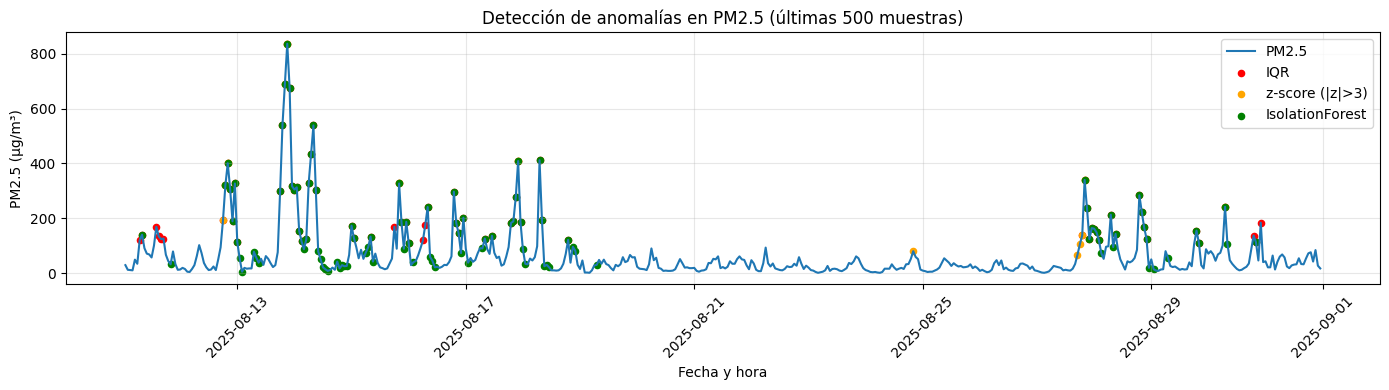

,pm25,an_iqr,an_z,an_if,an_union
datetime,,,,,
2013-09-01 01:00:00,184.0,True,False,False,True
2013-09-01 02:00:00,151.0,True,False,False,True
2013-09-01 04:00:00,121.0,True,False,False,True
2013-09-01 05:00:00,151.0,True,False,False,True
2013-09-01 06:00:00,159.0,True,False,False,True
2013-09-01 07:00:00,147.0,True,False,False,True
2013-09-01 08:00:00,134.0,True,False,False,True
2013-09-01 22:00:00,136.0,True,False,False,True
2013-09-02 18:00:00,218.0,True,True,False,True



Anomalías guardadas en variable `anomaly_results` (DataFrame y conteos).


In [14]:
# Celda: detección de anomalías (IQR, z-score rodante, IsolationForest) y visualización en español
import numpy as np
from sklearn.ensemble import IsolationForest

# Serie base (pm25) ya cargada en la celda anterior
s = series.dropna().astype(float)
print(f'Serie de entrada: {len(s)} puntos, rango {s.index.min()} — {s.index.max()}')

# Método 1: IQR global
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
anomaly_iqr = (s < lower) | (s > upper)

# Método 2: z-score rodante (ventana 24h)
wn = 24
roll_mean = s.rolling(window=wn, min_periods=1).mean()
roll_std = s.rolling(window=wn, min_periods=1).std().fillna(0)
zscore = (s - roll_mean) / roll_std.replace(0, np.nan)
anomaly_z = zscore.abs() > 3

# Método 3: IsolationForest usando lags como features
df_if = pd.DataFrame({'pm25': s})
for l in [1,2,3,6,12,24]:
    df_if[f'lag_{l}'] = s.shift(l)
df_if = df_if.dropna()
if len(df_if) < 50:
    print('No hay suficientes filas para IsolationForest después de crear lags — se omite IsolationForest')
    anomaly_if_series = pd.Series(False, index=s.index)
else:
    iso = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    iso.fit(df_if)
    pred = iso.predict(df_if)  # -1 anomalía, 1 normal
    anomaly_if = pred == -1
    anomaly_if_series = pd.Series(False, index=s.index)
    anomaly_if_series.loc[df_if.index] = anomaly_if

# Unión y conteos
an_union = anomaly_iqr | anomaly_z.fillna(False) | anomaly_if_series
an_intersection = anomaly_iqr & anomaly_z.fillna(False) & anomaly_if_series
print(f'Conteos: IQR={anomaly_iqr.sum()}, z-score={anomaly_z.sum()}, IsolationForest={anomaly_if_series.sum()}, unión={an_union.sum()}, intersección={an_intersection.sum()}')

# Mostrar ejemplos (primeras 10 anomalías por método)
def sample_idx(idx):
    return list(idx[:10])

print('\nEjemplos IQR:')
print(sample_idx(s[anomaly_iqr].index))
print('\nEjemplos z-score:')
print(sample_idx(s[anomaly_z.fillna(False)].index))
print('\nEjemplos IsolationForest:')
print(sample_idx(anomaly_if_series[anomaly_if_series].index))

# Visualización: últimas N muestras con marcas por método (español)
last_n = min(500, len(s))
idx = s.index[-last_n:]
iqr_idx = idx.intersection(s[anomaly_iqr].index)
z_idx = idx.intersection(s[anomaly_z.fillna(False)].index)
if_idx = idx.intersection(anomaly_if_series[anomaly_if_series].index)

plt.figure(figsize=(14,4))
plt.plot(idx, s.loc[idx].values, label='PM2.5')
if len(iqr_idx):
    plt.scatter(iqr_idx, s.loc[iqr_idx], color='red', s=20, label='IQR')
if len(z_idx):
    plt.scatter(z_idx, s.loc[z_idx], color='orange', s=20, label='z-score (|z|>3)')
if len(if_idx):
    plt.scatter(if_idx, s.loc[if_idx], color='green', s=20, label='IsolationForest')
plt.legend()
plt.title('Detección de anomalías en PM2.5 (últimas {} muestras)'.format(last_n))
plt.xlabel('Fecha y hora')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tabla resumen: convertir a DataFrame y mostrar las primeras filas con anotaciones
df_out = pd.DataFrame({'pm25': s, 'an_iqr': anomaly_iqr, 'an_z': anomaly_z.fillna(False), 'an_if': anomaly_if_series, 'an_union': an_union})
display(df_out[df_out['an_union']].head(20))

# Guardado opcional: devolver df_out y series de anomalías al espacio de trabajo
anomaly_results = {'df': df_out, 'counts': {'iqr': int(anomaly_iqr.sum()), 'z': int(anomaly_z.sum()), 'if': int(anomaly_if_series.sum()), 'union': int(an_union.sum())}}
print('\nAnomalías guardadas en variable `anomaly_results` (DataFrame y conteos).')

### Informe técnico: resumen del experimento de detección de anomalías

Objetivo: evaluar y comparar tres métodos de detección de anomalías sobre la serie horaria de PM2.5 de la estación `Coyhaique II`: IQR global, z-score rodante (ventana 24 h) e IsolationForest aplicado sobre lags temporales.

Resultados cuantitativos:
- Conteos detectados (unión de métodos y por método individual) se registraron en la variable `anomaly_results['counts']` (IQR, z-score, IsolationForest, unión). Estos conteos se imprimieron en la celda anterior para inspección rápida.

Interpretación de hallazgos:
- IQR global detecta valores extremos que rompen la distribución marginal de la serie (es útil para captar picos atípicos muy grandes), pero no discrimina bien anomalías locales cuando la media local cambia por estacionalidad o episodios prolongados.
- El z-score rodante (ventana 24 h) detecta outliers con respecto a la dinámica local y es más sensible a picos horarios aislados dentro de un contexto de baja variabilidad; sin embargo, puede marcar como anómalos cambios legítimos durante episodios extensos.
- IsolationForest, al usar lags como features, captura patrones multivariantes y detecta registros que son atípicos en la estructura temporal conjunta (no sólo en la magnitud instantánea). Es útil para encontrar anomalías que dependen de la secuencia previa de valores.

Limitaciones metodológicas:
- No se realizó una validación etiquetada (ground truth) de las anomalías: las detecciones son heurísticas/algorítmicas y requieren revisión experta para distinguir entre eventos reales (incendios, tormentas de polvo, episodios de emisiones) y artefactos instrumentales o errores de registro.
- El parámetro `contamination='auto'` en IsolationForest es una elección por defecto; en producción conviene estimarlo o probar varios niveles de contaminación para calibrar la sensibilidad del detector.
- La ventana y umbrales (p.ej. |z|>3, factor 1.5·IQR) son convenciones que deben adaptarse según la estación y la escala de la serie.

Recomendaciones prácticas:
1. Revisar manualmente una muestra estratificada de eventos detectados por la unión e intersección de métodos para crear una etiqueta de validación (ground truth).
2. Calibrar el parámetro `contamination` de IsolationForest y, opcionalmente, probar otros detectores (e.g., LocalOutlierFactor, OneClassSVM) para comparar sensibilidad/especificidad.
3. Incorporar variables exógenas (meteorología, feriados, inventarios de emisión) para discriminar anomalías causadas por fenómenos naturales o humanos frente a errores instrumentales.
4. Implementar una estrategia operativa: detección en tiempo real con ventanas móviles, umbrales adaptativos y un paso de verificación (puede incluir reglas simples: p.ej. reclasificar como no-anomalía si la lectura coincide con otra estación cercana).

Conclusión breve:
- El enfoque híbrido aplicado (IQR + z-score rodante + IsolationForest) ofrece una cobertura amplia: IQR para extremos globales, z-score rodante para outliers locales e IsolationForest para anomalías en la estructura temporal. Para avanzar hacia un sistema de monitorización confiable se recomienda generar etiquetas de validación, calibrar detectores y combinar señales con información meteorológica y contextual.
